-----------------------------------------
organic
-----------------------------------------
Galaxy "organic" redshift: 3.0	 total:  x:7.05	 y:0.8690206026579091	 z:2.0
Galaxy "organic" redshift: 7.0	 total:  x:5.971	 y:5.04362211696016	 z:6.0
Galaxy "organic" redshift: 11.0	 total:  x:5.487	 y:9.357338248215568	 z:10.0
Galaxy "organic" redshift: 15.0	 total:  x:5.037	 y:11.547363709884849	 z:14.0
Galaxy "organic" redshift: 19.0	 total:  x:4.485	 y:16.100517458863905	 z:18.0
Galaxy "organic" redshift: 23.0	 total:  x:3.984	 y:29.680799870207792	 z:22.0
Galaxy "organic" redshift: 27.0	 total:  x:3.528	 y:34.78503571248483	 z:26.0
Galaxy "organic" redshift: 31.0	 total:  x:3.017	 y:138.5267362734638	 z:30.0
Galaxy "organic" redshift: 35.0	 total:  x:2.478	 y:138.17394347630756	 z:34.0
Galaxy "organic" redshift: 39.0	 total:  x:2.237	 y:348.926683153404	 z:38.0
Galaxy "organic" redshift: 43.0	 total:  x:2.012	 y:2131.8915278607055	 z:42.0
Galaxy "organic" redshift: 47.0	 total:  x:1.737	 y

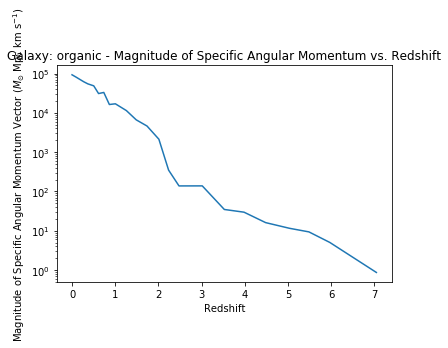

-----------------------------------------
gm_late
-----------------------------------------
Galaxy "gm_late" redshift: 3.0	 total:  x:7.05	 y:1.2403324984248718	 z:2.0
Galaxy "gm_late" redshift: 7.0	 total:  x:5.971	 y:4.038602863547277	 z:6.0
Galaxy "gm_late" redshift: 11.0	 total:  x:5.487	 y:6.092926736628401	 z:10.0
Galaxy "gm_late" redshift: 15.0	 total:  x:5.037	 y:6.850970598295576	 z:14.0
Galaxy "gm_late" redshift: 19.0	 total:  x:4.485	 y:3.0489602525851316	 z:18.0
Galaxy "gm_late" redshift: 23.0	 total:  x:3.984	 y:23.156395882773346	 z:22.0
Galaxy "gm_late" redshift: 27.0	 total:  x:3.528	 y:48.271016214687215	 z:26.0
Galaxy "gm_late" redshift: 31.0	 total:  x:3.017	 y:105.05847533723613	 z:30.0
Galaxy "gm_late" redshift: 35.0	 total:  x:2.478	 y:168.52885208519191	 z:34.0
Galaxy "gm_late" redshift: 39.0	 total:  x:2.237	 y:75.87632372351007	 z:38.0
Galaxy "gm_late" redshift: 43.0	 total:  x:2.012	 y:279.6719549416605	 z:42.0
Galaxy "gm_late" redshift: 47.0	 total:  x:1.737	

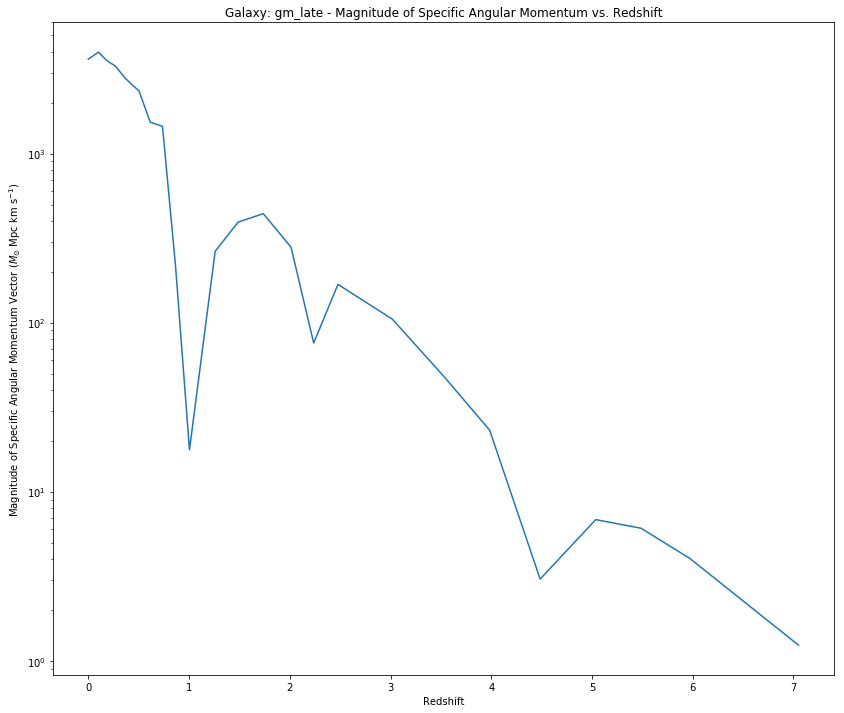

-----------------------------------------
gm_early
-----------------------------------------
Galaxy "gm_early" redshift: 3.0	 total:  x:7.05	 y:0.5976047727361922	 z:2.0
Galaxy "gm_early" redshift: 7.0	 total:  x:5.971	 y:3.354799207663277	 z:6.0
Galaxy "gm_early" redshift: 11.0	 total:  x:5.487	 y:4.617497585969449	 z:10.0
Galaxy "gm_early" redshift: 15.0	 total:  x:5.037	 y:64.8779135974254	 z:14.0
Galaxy "gm_early" redshift: 19.0	 total:  x:4.485	 y:111.24992363703112	 z:18.0
Galaxy "gm_early" redshift: 23.0	 total:  x:3.984	 y:93.59997207275603	 z:22.0
Galaxy "gm_early" redshift: 27.0	 total:  x:3.528	 y:231.20483516574222	 z:26.0
Galaxy "gm_early" redshift: 31.0	 total:  x:3.017	 y:1238.5172386394715	 z:30.0
Galaxy "gm_early" redshift: 35.0	 total:  x:2.478	 y:6850.545126106896	 z:34.0
Galaxy "gm_early" redshift: 39.0	 total:  x:2.237	 y:10461.324676887676	 z:38.0
Galaxy "gm_early" redshift: 43.0	 total:  x:2.012	 y:13241.935420171376	 z:42.0
Galaxy "gm_early" redshift: 47.0	 tota

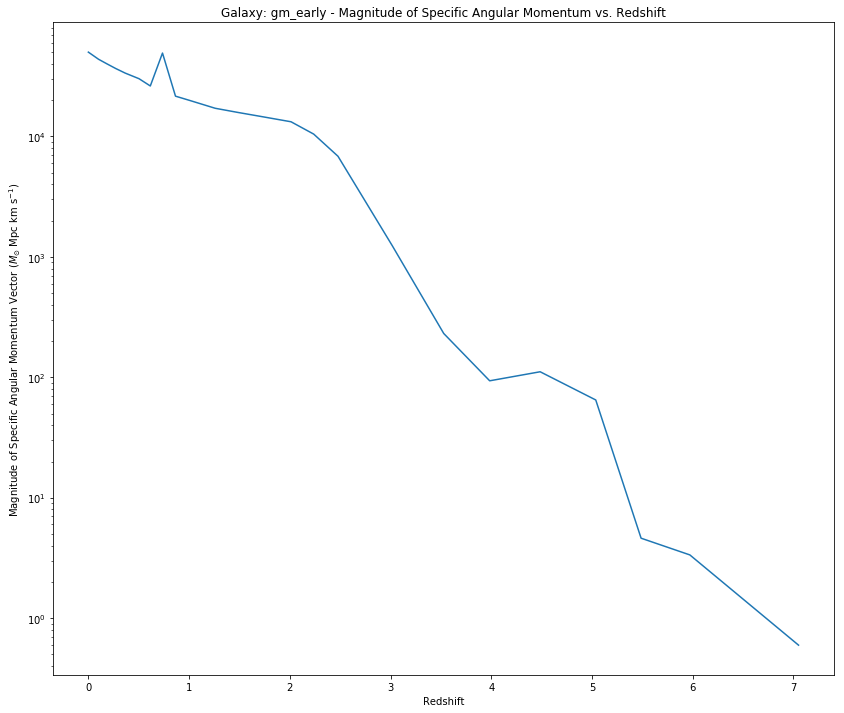

In [3]:
import h5py
import os
import matplotlib.pyplot as plt
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import numpy as np
import re

axisScale = 0.03
datasets = ['organic', 'gm_late', 'gm_early']

for dataset in datasets:
    print('-----------------------------------------')
    print(dataset)
    print('-----------------------------------------')
    
    files = listdir('C:\\Users\\katha\\GalaxyMorphology\\' + dataset)
    os.path.join("/C:", "Users","katha","GalaxyMorphology", dataset)

    count = 0

    galaxyAm = np.array(range(96), dtype=float).reshape(24,4)
    
    for file in files:
    #if 1==1:



        #file = 'star_particles_015_z002p012.hdf5'
        #file = 'star_particles_028_z000p000.hdf5'
        
        # get redshift from the filename
        m = re.search('(z[0-9])\w+', file)
        s = m.group(0).replace('z', '')
        s = s.replace('p', '.')
        
        redshift = float(s)
        #print('redshift = ' + s + ' converted: ' + str(redshift))
        
        # load data for a particular galaxy at a particular redshift
        f = h5py.File('C:\\Users\\katha\\GalaxyMorphology\\' + dataset + '/' + file,'r')

        ds_c = f['Coordinates']
        ds_v = f['Velocity']
        ds_m = f['Mass']
        
        r = np.cross(ds_c, ds_v)
        #r1 = np.transpose(np.multiply(ds_m, np.transpose(r)))
        specAngMomTot = np.linalg.norm(r, axis=1)

        # Store totals of all particles for each redshift in the current galaxy
        galaxyAm[count, 0] = redshift
        galaxyAm[count, 1] = np.sum(specAngMomTot)
              
        count = count + 1
    
    # print each angular momentum component's total per redshift
    for n in range(24):
        print('Galaxy "' + dataset + '" redshift: ' + str(galaxyAm[n][3]) + '\t total:  x:' + str(galaxyAm[n][0]) + '\t y:' + str(galaxyAm[n][1]) + '\t z:' + str(galaxyAm[n][2]))
    


    #print ('length: ' + str(np.shape(galaxyAm)[0]))
    #plt.plot(galaxyAm[0:,3], galaxyAm[0:,2])
    
    plt.plot(galaxyAm[0:,0], galaxyAm[0:,1])
    plt.title('Galaxy: ' + dataset + ' - Magnitude of Specific Angular Momentum vs. Redshift')
    plt.xlabel('Redshift')
    plt.ylabel(r'Magnitude of Specific Angular Momentum Vector ($M_{\odot}$ Mpc km s$^{-1}$)')
    plt.ticklabel_format(axis='y', style='sci', useMathText=True)
    plt.rcParams["figure.figsize"] = (14,12)
    plt.semilogy()
    plt.show()